# Tidy Data Project

### Step 1: Import necessary libraries and load in the dataset

- .head() shows the first 5 rows of a DataFrame
- .info() provides an overview of column names, non-null values, and data types which can help the user understand the dataset's structure and missing data

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("TidyData-Project/olympics_08_medalists.csv")
display(data.head())
data.info()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   medalist_name                 1875 non-null   object
 1   male_archery                  11 non-null     object
 2   female_archery                9 non-null      object
 3   male_athletics                85 non-null     object
 4   female_athletics              81 non-null     object
 5   male_badminton                12 non-null     object
 6   female_badminton              10 non-null     object
 7   male_baseball                 72 non-null     object
 8   male_basketball               35 non-null     object
 9   female_basketball             36 non-null     object
 10  male_boxing                   44 non-null     object
 11  male_canoeing and kayaking    53 non-null     object
 12  female_canoeing and kayaking  21 non-null     object
 13  male_road bicycle 

### Step 2: Melt the dataset to convert from wide format into long format

- The original dataset has one column per sport and gender combination (ex: male_archery)
- pd.melt() transforms the data from wide to long format
    - medalist_name is kept as the identifier
    - All other columns are melted into two: Sport_Gender and Medal
- This format is more suitable for analysis and plotting

In [ ]:
# melting the dataset and formating it to look better
data_melted=data.melt(id_vars=['medalist_name'], var_name='Sport_Gender', value_name='Medal')
data_melted.head()

,medalist_name,Sport_Gender,Medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN


### Step 3: Drop NaN values

- Many rows have NaN values in the Medal column (indicating no medal in that sport/gender)
- This line filters out those rows to retain only actual medalist records

In [ ]:
# remove NaN values
data_melted.dropna(subset=['Medal'])

,medalist_name,Sport_Gender,Medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold
...,...,...,...
130932,Steeve Guénot,male_greco-roman wrestling,gold
131159,Yannick Szczepaniak,male_greco-roman wrestling,bronze
131162,Yavor Yanakiev,male_greco-roman wrestling,bronze
131200,Yury Patrikeyev,male_greco-roman wrestling,bronze


### Step 4: Split the column and remove the original column

- The column Sport_Gender combines both gender and sport names
- This line splits that column into two separate columns: Gender and Sport
- The original Sport_Gender column is dropped to clean up the DataFrame

In [ ]:
#split the Sport_Gender column into two separate columns and then remove Sport_Gender column
data_melted[['Gender', 'Sport']]=data_melted['Sport_Gender'].str.split('_', n=1, expand=True)
data_melted=data_melted.drop(columns=['Sport_Gender'])
data_melted.head()

,medalist_name,Medal,Gender,Sport
0,Aaron Armstrong,NaN,male,archery
1,Aaron Peirsol,NaN,male,archery
2,Abdullo Tangriev,NaN,male,archery
3,Abeer Abdelrahman,NaN,male,archery
4,Abhinav,NaN,male,archery


### Step 5: Pivot Table

- This pivot table aggregates the number of medals awarded per sport
- It counts how many medals appear under each sport name
- The column is then renamed 'Total Medals'

In [ ]:
# make a pivot table to display the total medals by sport
total_medals=data_melted.pivot_table(index='Sport', values='Medal', aggfunc='count').reset_index()
total_medals.rename(columns={'Medal': 'Total Medals'}, inplace=True)
total_medals

,Sport,Total Medals
0,archery,20
1,artistic gymnastics,49
2,association football,109
3,athletics,166
4,badminton,22
5,baseball,72
6,basketball,71
7,beach volleyball,12
8,bmx,6
9,boxing,44


### Step 6: Visualizations

- This creates a horizontal bar plot of total medals per sport using Seaborn
- Sports are sorted in descending order of medal count
- This visualization helps identify which sports awarded the most medals

##### Top 10 Sports by Medal Count (2008 Olympics) Barplot

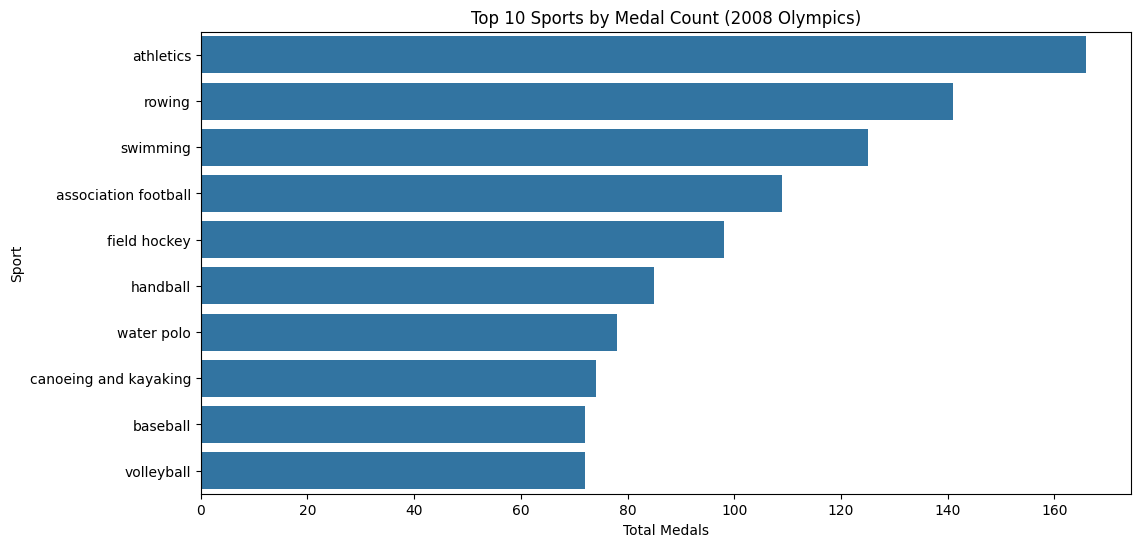

In [ ]:
# make a barplot to show which sports gave out the most medals, naturally the team sports are higher, but there is also swimming and athletics which I assume is track and field which have a lot of events
plt.figure(figsize=(12, 6))
sns.barplot(x="Total Medals", y="Sport", data=total_medals.sort_values("Total Medals", ascending=False).head(10))
plt.title("Top 10 Sports by Medal Count (2008 Olympics)")
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.show()

##### Percentage of Medals Won by Gender (2008 Olympics) Pie Chart

- This shows the overall medal count by gender
- A pie chart displays the comparison between male and female medalists
- It highlights any gender-based participation or reward disparities in Olympic events

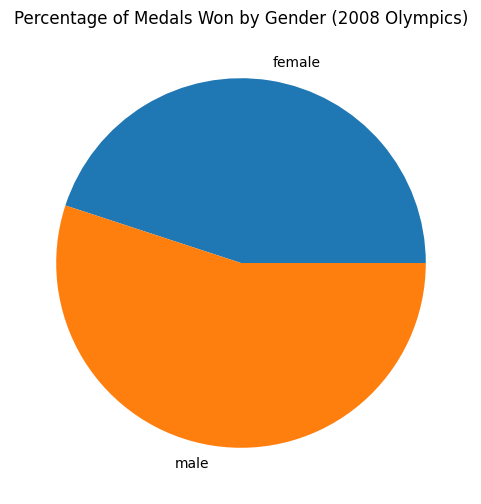

In [ ]:
# made a pie chart to show the comparison between male and female medal counts
medals_by_gender = data_melted.pivot_table(index="Gender", values="Medal", aggfunc="count").reset_index()
plt.figure(figsize=(6, 6))
plt.pie(medals_by_gender["Medal"], labels=medals_by_gender["Gender"])
plt.title("Percentage of Medals Won by Gender (2008 Olympics)")
plt.show()